In [1]:
from music21 import *
import pickle

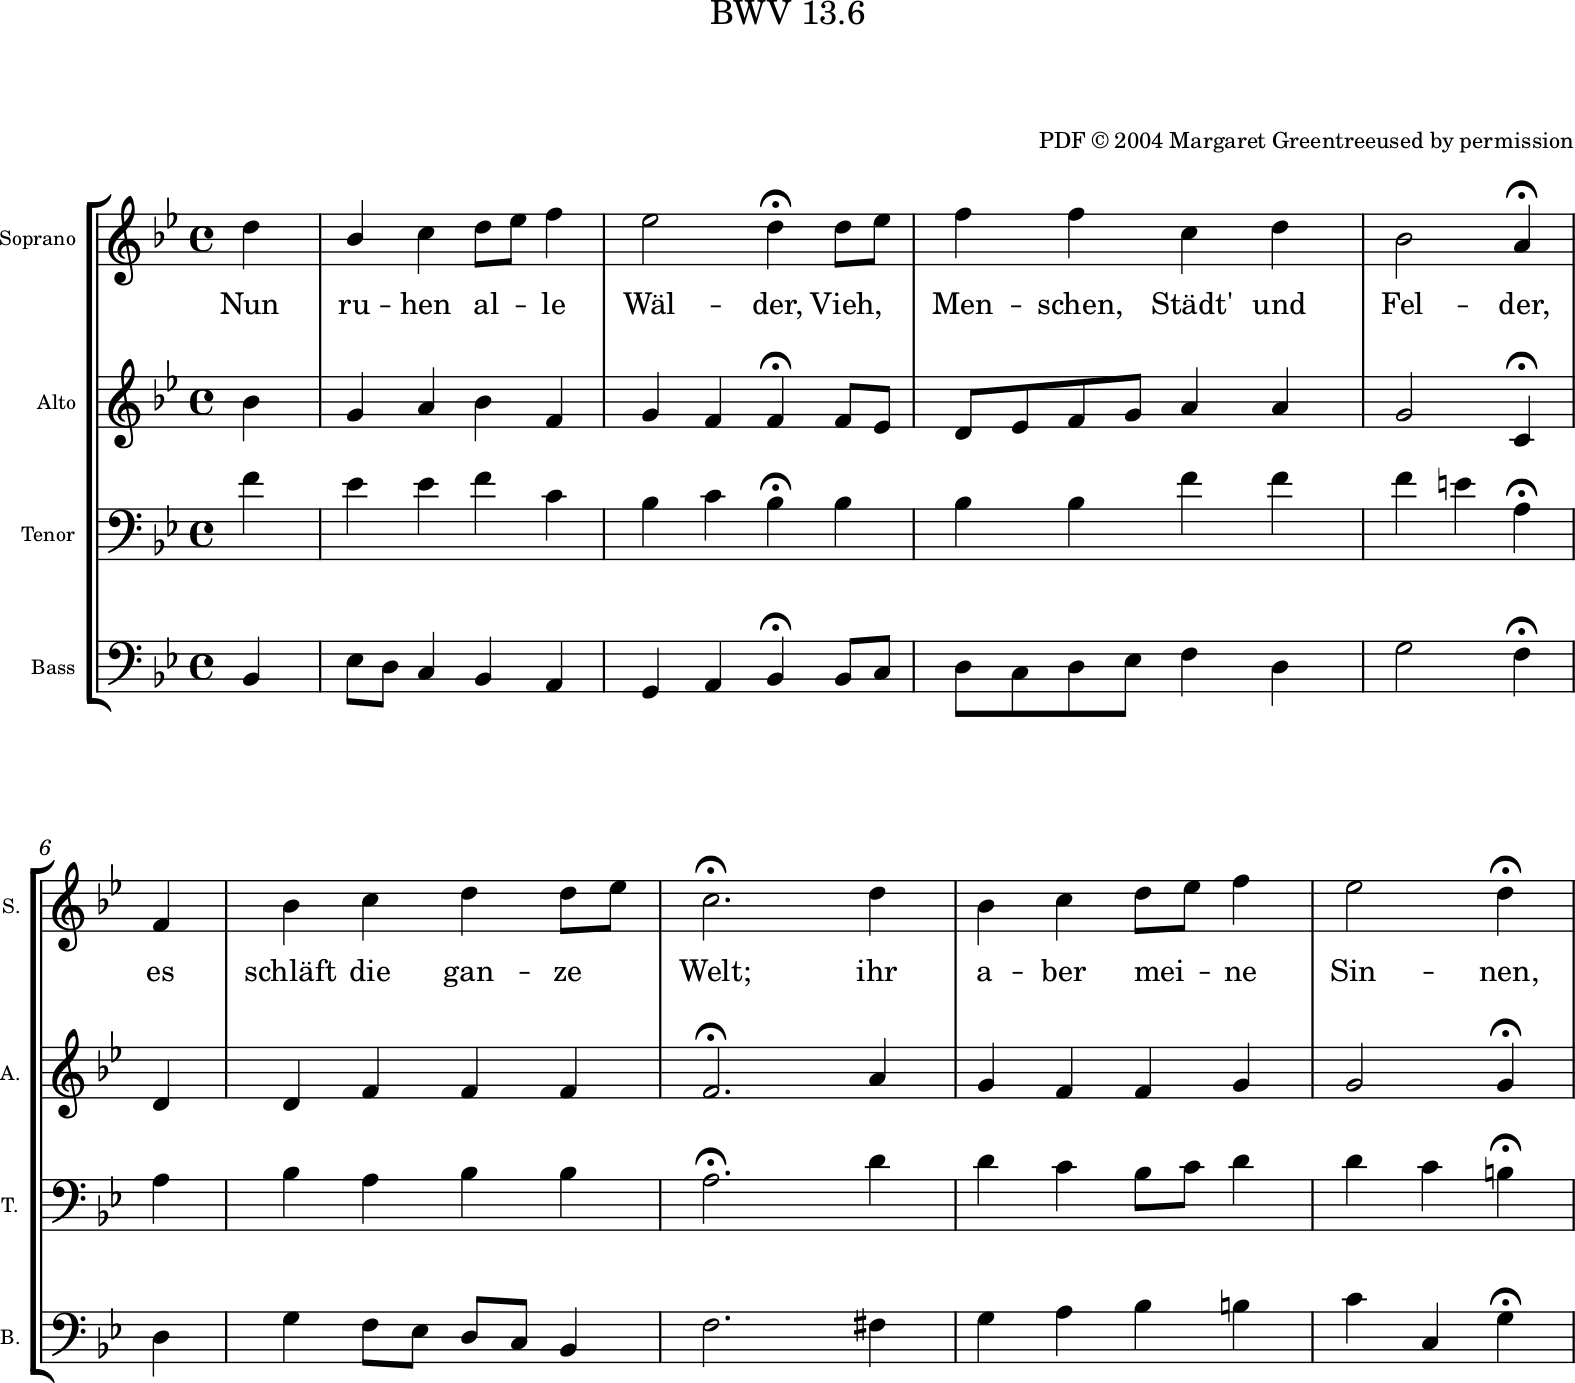

In [10]:
# sc = corpus.parse('bach/bwv66.6')
# sc = corpus.parse('haydn/opus1no1/movement1.mxl')
# sc = corpus.parse('bach/bwv111.6.mxl')
sc = corpus.parse('bach/bwv13.6.mxl')
sc.show()

In [11]:
parts_to_parse = []
for part in sc.parts:
    this_part = [] # stores the name followed by a dict of the notes
    part_notes = [] # stores the relevant data for notes and rests as a list with note, timestamp
    measure_offset = 0
    part_name = part[0].partName # Soprano, Alto, etc
    this_part.append(part_name)
    for el in part.recurse():
        running_offset = measure_offset
        if type(el) == stream.Measure:
            measure_offset = el.offset # sets the offset to the measure we have arrived to
        elif type(el) == note.Note:
            running_offset += el.offset # adds the offset the current note exists at
            part_notes.append((running_offset, el.pitch.midi)) # this is where we store the musical data we care about (this could be a tuple of info)
        elif type(el) == note.Rest:
            running_offset += el.offset # adds the offset the current note exists at
            part_notes.append((running_offset, -1)) # rests are stored as -1
    # once we've gone through all the notes in the part, we can store them in a list (where the first index is the highest part and the last is the lowest)
    this_part.append(part_notes)
    parts_to_parse.append(this_part)

print(parts_to_parse)

[['Soprano', [(0.0, 74), (1.0, 70), (2.0, 72), (3.0, 74), (3.5, 75), (4.0, 77), (5.0, 75), (7.0, 74), (8.0, 74), (8.5, 75), (9.0, 77), (10.0, 77), (11.0, 72), (12.0, 74), (13.0, 70), (15.0, 69), (16.0, 65), (17.0, 70), (18.0, 72), (19.0, 74), (20.0, 74), (20.5, 75), (21.0, 72), (24.0, 74), (25.0, 70), (26.0, 72), (27.0, 74), (27.5, 75), (28.0, 77), (29.0, 75), (31.0, 74), (32.0, 74), (32.5, 75), (33.0, 77), (34.0, 77), (35.0, 72), (36.0, 74), (37.0, 70), (39.0, 69), (40.0, 65), (41.0, 70), (42.0, 72), (43.0, 74), (44.0, 75), (45.0, 74), (46.0, 72), (47.0, 70)]], ['Alto', [(0.0, 70), (1.0, 67), (2.0, 69), (3.0, 70), (4.0, 65), (5.0, 67), (6.0, 65), (7.0, 65), (8.0, 65), (8.5, 63), (9.0, 62), (9.5, 63), (10.0, 65), (10.5, 67), (11.0, 69), (12.0, 69), (13.0, 67), (15.0, 60), (16.0, 62), (17.0, 62), (18.0, 65), (19.0, 65), (20.0, 65), (21.0, 65), (24.0, 69), (25.0, 67), (26.0, 65), (27.0, 65), (28.0, 67), (29.0, 67), (31.0, 67), (32.0, 65), (33.0, 65), (33.5, 67), (34.0, 69), (34.5, 70), (

In [4]:
for p in parts_to_parse:
    part_name = p[0]
    with open(f'{part_name}.pickle', 'wb') as handle:
        pickle.dump(p[1], handle, protocol=4)

In [5]:
with open('Soprano.pickle', 'rb') as handle:
    unserialized_sop_data = pickle.load(handle)
with open('Alto.pickle', 'rb') as handle:
    unserialized_alto_data = pickle.load(handle)
with open('Tenor.pickle', 'rb') as handle:
    unserialized_ten_data = pickle.load(handle)
with open('Bass.pickle', 'rb') as handle:
    unserialized_bass_data = pickle.load(handle)
# print(unserialized_sop_data)
# print('------')
# print(unserialized_alto_data)
# print('------')
# print(unserialized_ten_data)
# print('------')
# print(unserialized_bass_data)

In [6]:
# sc.show('midi')

In [7]:
# sc.write("midi", "visualized_corpus.mid")

In [8]:
# sc.write("mp3", "visualized_corpus.mp3") this format is not supported by music21 yet

In [9]:
sc.show('musicXML') # use this to change tempo to half speed